In [1]:
import pylab
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
from scipy import optimize
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

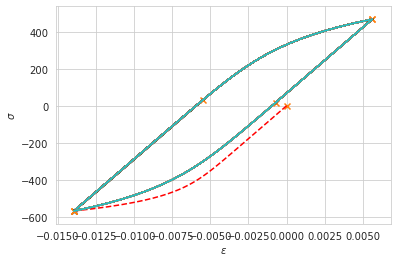

[0.0, -567.6526388302169, 31.3323528372606, -567.6526388302169, 467.81041145121355, 17.878716383834444, 467.81041145121355, -567.6526388302169]
[0.0, -0.013956660586646569, -0.005491636244223514, -0.013956660586646569, 0.005630412206856025, -0.0007085781495117863, 0.005630412206856025, -0.013956660586646569]


In [10]:
# Geometry

Kt = 3.00

# Material 

E = 71000.0
sig_fp = 1466.0
b = -0.143
c = -0.619
eps_fp = 0.262
Hpr = 977.0
npr = 0.106


# Stress History

numPks = 7
S = np.array([0.0,-250.0,-50.0,-250.0,150.0,0.0,150.0,-250.0])
SigOr = np.array([0,0,0,0,0,0,1,0])

# Data Storage Arrays
sigPk = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
epsPk = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
delsig = [0.0]

# Handle first cycle

delS = S[1]-S[0]             
signS = delS/(abs(delS))                    # Update sign of loading
delS = abs(delS)
# find delsig using non-linear root finding
def f(sigma):                               #R-O Equation for initial load
        return ((1/Kt)*np.sqrt((sigma**2)+(sigma*E*((sigma/Hpr)**(1/npr))))-delS)  
delsig = optimize.brentq(f,delS, Kt*delS, args=(), xtol=1e-10, maxiter=100, full_output=True, disp=True)
delsig = delsig[0]
deleps = (delsig/E)+((delsig/Hpr)**(1/npr)) # R-O equation to find change in strain
sigPk[1] = sigPk[0] + signS*delsig          # Store peak stress and strain 
epsPk[1] = epsPk[0] + signS*deleps

# Loop over subsequent turning points 

for i in range (2,numPks+1):     # Get origin point, accounting for whether or not origin is previous point
    if SigOr[i] == 0:
        iOrigin = i-1            
    else:
        iOrigin = SigOr[i]
    delS = S[i] - S[iOrigin]
    signS = delS/(abs(delS))
    delS = abs(delS)
    def f(sigma1):               # solve for stress using factor of two expansion of R-O equation for subsequent loads
        return ((1/Kt)*np.sqrt(((sigma1/2)**2)+((sigma1*E)/2)*((sigma1/(2*Hpr))**(1/npr)))-(delS/2))
    delsig = optimize.brentq(f,delS, Kt*delS, args=(), xtol=1e-10, maxiter=100, full_output=True, disp=True)
    delsig = delsig[0]
    deleps = 2*((delsig/(2*E))+((delsig/(2*Hpr))**(1/npr)))
    sigPk[i] = sigPk[iOrigin] + signS*delsig
    epsPk[i] = epsPk[iOrigin] + signS*deleps
    
# Set up a plot

Npts = 50

# plot initial loading

stress = np.linspace(sigPk[0],sigPk[1],num = Npts)
stress = abs(stress)
strain = (stress/E) + ((stress/Hpr)**(1/npr))
plt.plot(strain*-1,stress*-1,'r',linestyle='dashed')
plt.scatter(strain[49]*-1,stress[49]*-1,marker = '$A$')
    
# loop over subsequent turning points

for i in range(2,numPks+1):
    if SigOr[i] == 0:
        iOrigin = i - 1
    else:
        iOrigin = SigOr[i]
    delsig = sigPk[i] - sigPk[iOrigin]
    signS = delsig/(abs(delsig))
    delsig = abs(delsig)
    stress = np.linspace(0,delsig,Npts)
    strain = (stress/E) + 2*((stress/2/Hpr)**(1/npr)) 
    strain = epsPk[iOrigin] + (signS*strain)
    stress = sigPk[iOrigin] + (signS*stress)
    for j in range(0,Npts):
        plt.plot(strain,stress)

from matplotlib.pyplot import figure

sns.set_style('whitegrid')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\sigma$')
plt.scatter(epsPk,sigPk,marker = 'x')
plt.show()

print(sigPk)
print(epsPk)

In [3]:
print(sigPk)

[0.0, -567.6526388302169, 31.3323528372606, -567.6526388302169, 467.81041145121355, 17.878716383834444, 467.81041145121355, -567.6526388302169]


In [4]:
print(epsPk)

[0.0, -0.013956660586646569, -0.005491636244223514, -0.013956660586646569, 0.005630412206856025, -0.0007085781495117863, 0.005630412206856025, -0.013956660586646569]


In [15]:
SWT1 = 0.132614565
SWT2 = 4.581518291
SWT3 = 1.482722843

def f(Nf1):
    return (((sig_fp**2)/E)*((2*Nf1)**(2*b)) + (sig_fp*eps_fp*((2*Nf1)**(b+c))))-SWT1
Nf1 = optimize.brentq(f,1, 10**9, args=(), xtol=1e-10, maxiter=100, full_output=True, disp=True)
Nf1[0]

88607325.84024236

In [16]:
def f(Nf2):
    return (((sig_fp**2)/E)*((2*Nf2)**(2*b)) + (sig_fp*eps_fp*((2*Nf2)**(b+c))))-SWT2
Nf2 = optimize.brentq(f,1, 10**9, args=(), xtol=1e-10, maxiter=100, full_output=True, disp=True)
Nf2[0]

1018.1578314753285

In [17]:
def f(Nf3):
    return (((sig_fp**2)/E)*((2*Nf3)**(2*b)) + (sig_fp*eps_fp*((2*Nf3)**(b+c))))-SWT3
Nf3 = optimize.brentq(f,1, 10**9, args=(), xtol=1e-10, maxiter=100, full_output=True, disp=True)
Nf3[0]

24442.128573086935